/workspaces
/
train loss:2.3075206050556547
=== epoch:1, train acc:0.14333333333333334, test acc:0.1277 ===
train loss:2.28985389439313
train loss:2.2971542056048038
train loss:2.2939040004803375
=== epoch:2, train acc:0.15333333333333332, test acc:0.1308 ===
train loss:2.3000595280265848
train loss:2.2918159884330547
train loss:2.28586279051661
=== epoch:3, train acc:0.14666666666666667, test acc:0.1343 ===
train loss:2.3078512676962277
train loss:2.293946029182258
train loss:2.30008740799994
=== epoch:4, train acc:0.14666666666666667, test acc:0.1366 ===
train loss:2.302875136141743
train loss:2.29805692322911
train loss:2.302095286828441
=== epoch:5, train acc:0.14333333333333334, test acc:0.1387 ===
train loss:2.293927338817828
train loss:2.298027636950669
train loss:2.294695128694371
=== epoch:6, train acc:0.15333333333333332, test acc:0.1414 ===
train loss:2.2966170604261773
train loss:2.2989638771852325
train loss:2.2940608558994784
=== epoch:7, train acc:0.15666666666666668, te

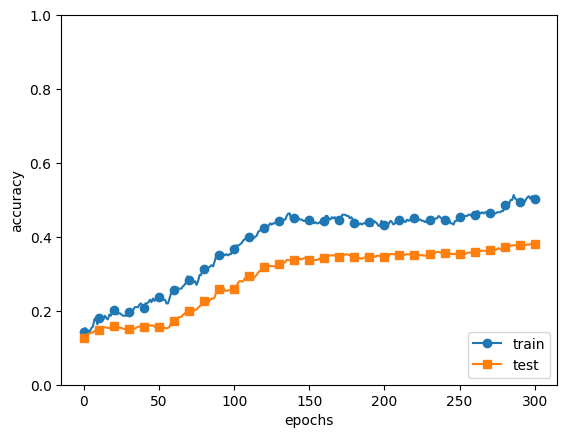

In [5]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test,t_test) = load_mnist(normalize=True)

#오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

use_dropout = True #dropout을 쓰지 않을 때는 False
dropout_ratio = 0.25

network = MultiLayerNetExtend(
        input_size=784, hidden_size_list=[100,100,100,100,100,100],output_size=10,use_dropout=use_dropout, dropout_ration = dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=301, mini_batch_size=100, optimizer = 'sgd', optimizer_param = {'lr':0.01},verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train':'o', 'test':'s'}
x = np.arange(len(train_acc_list))
plt.plot(x,train_acc_list, marker='o', label = 'train', markevery = 10)
plt.plot(x, test_acc_list, marker='s', label = 'test', markevery = 10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc = 'lower right')
plt.show()